### Imports

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import sklearn

### Lecture du csv

In [147]:
df = pd.read_csv('cardio_train.csv', sep=';')

### Echantillon de données

In [148]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


Nous avons 12 variables et 70,000 observations dans le dataset. Nos variables sont uniquement quantitatives dont plusieurs variables binaires (1 ou 0).

### Données manquantes

In [150]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Il n'y a pas de données manquantes dans le dataset. 

### Données en doublons

In [151]:
df.duplicated().sum()

0

Il n'y a pas de doublons dans le dataset. 

### Données aberrantes

In [152]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


On peut remarquer qu'il y a des données aberrantes notamment au niveau de la taille (max de 250 cm), le poids et systolic et diastolic blood pressure (ap_hi & ap_lo). Il y a des valeurs négatives ainsi que des très grandes valeurs dans les colonnes de pression artérielle ainsi que des valeurs aberrantes dans les colonnes de taille et poids. Il faut analyser le dataset afin d'identifier s'il y a des enfants ce qui expliquerai ces chiffres bas pour la taille et le poids. Si on ne retrouve pas d'enfant dans le dataset il faudra alors supprimer les lignes ou il y a des données aberrantes afin d'avoir un dataset plus équilibré. 

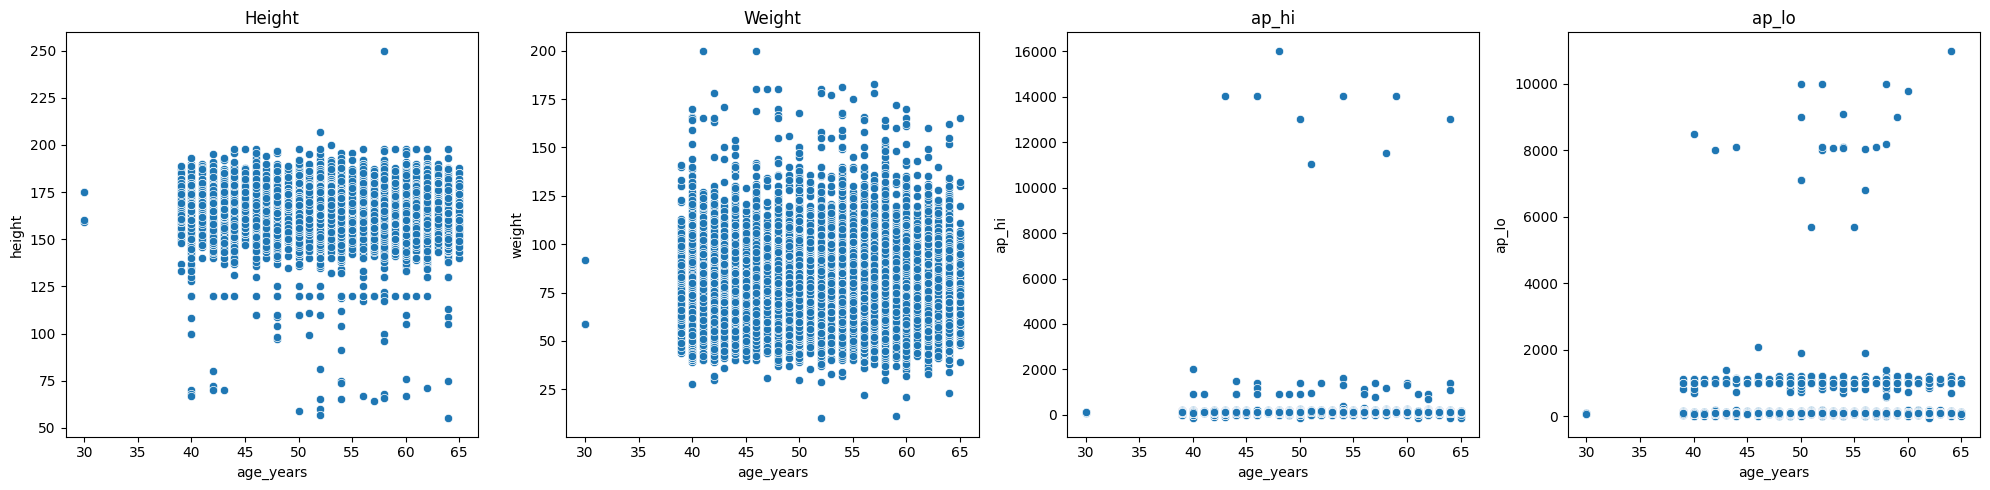

In [153]:
df['age_years'] = (df['age'] / 365).round().astype('int')

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

sns.scatterplot(x='age_years', y='height', data=df, ax=axs[0])
axs[0].set_title('Height')
sns.scatterplot(x='age_years', y='weight', data=df, ax=axs[1])
axs[1].set_title('Weight')
sns.scatterplot(x='age_years', y='ap_hi', data=df, ax=axs[2])
axs[2].set_title('ap_hi')
sns.scatterplot(x='age_years', y='ap_lo', data=df, ax=axs[3])
axs[3].set_title('ap_lo')

plt.tight_layout()
plt.show()



Comme on peut le voir dans ces 4 graphiques il y a des valeurs aberrantes pour la taille ; une valeur à 250 cm et plusieurs valeurs en dessous de 125cm alors que l'age minimum de ce dataset est de un peu moins de 30 ans. On a le meme cas pour le poids ou il y a de nombreuses valeurs à environ 25kg ce qui n'est pas possible pour un adulte de 25 ans+. On peut donc considérer ces valeurs comme aberrantes et elles devront etre enlevée du dataset. 

On retrouve le meme cas pour la pression artérielle avec des valeurs largement au dessus des autres à 6,000+ pour l'ap_lo et 10,000+ pour l'ap_hi.

En sachant que la pression artérielle varie autour de 120 pour ap_hi et 80 pour ap_lo. Or, ici nous avons des valeurs beaucoup trop grandes. Nous allons donc également supprimer ces valeurs. 

### Transformation des données

In [154]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48


Nous transformons dans un premier temps la colonne age qui est exprimée en jours afin de l'exprimer en années. Cette nouvelle colonne s'apelle age_years. C'est une colonne que nous avons utilisé dans le graphique précédent afin d'identifier les valeurs aberrantes c'est pour cela qu'elle a été crée lors de l'étape précédente.

In [155]:
df = df[(df['height'] >= df['height'].quantile(0.0025)) & (df['height'] <= df['height'].quantile(0.995))]
df = df[(df['weight'] >= df['weight'].quantile(0.0025)) & (df['weight'] <= df['weight'].quantile(0.995))]
df = df[(df['ap_hi'] >= df['ap_hi'].quantile(0.0025)) & (df['ap_hi'] <= df['ap_hi'].quantile(0.995))]
df = df[(df['ap_lo'] >= df['ap_lo'].quantile(0.0025)) & (df['ap_lo'] <= df['ap_lo'].quantile(0.995))]
df = df[df['ap_lo'] <= df['ap_hi']]
df.shape

(67415, 14)

In [156]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
count,67415.000000,67415.000000,67415.000000,67415.000000,67415.000000,67415.000000,67415.000000,67415.000000,67415.000000,67415.000000,67415.000000,67415.000000,67415.000000,67415.000000
mean,49974.736453,19466.265119,1.347252,164.380049,73.823365,126.384944,81.244115,1.362605,1.224149,0.087176,0.052807,0.803857,0.492976,53.331781
std,28855.753495,2467.149484,0.476100,7.621863,13.446714,15.988716,9.162530,0.677606,0.570144,0.282096,0.223650,0.397081,0.499954,6.764931
min,0.000000,10798.000000,1.000000,140.000000,43.000000,80.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,24988.500000,17660.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50017.000000,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,74879.500000,21325.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.000000,2.000000,186.000000,125.000000,188.000000,150.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


Ici j'ai décidé d'utiliser les percentiles pour supprimer les données aberrantes. Nous avons donc gardé les valeurs qui se situent entre 2.5 et 97.5% du dataset. Cela nous a permis de supprimer les valeurs dites 'outlier' qui sortent un peu trop du lot et qui peuvent pousser notre algorithme à la confusion lors de prédiction de données. 

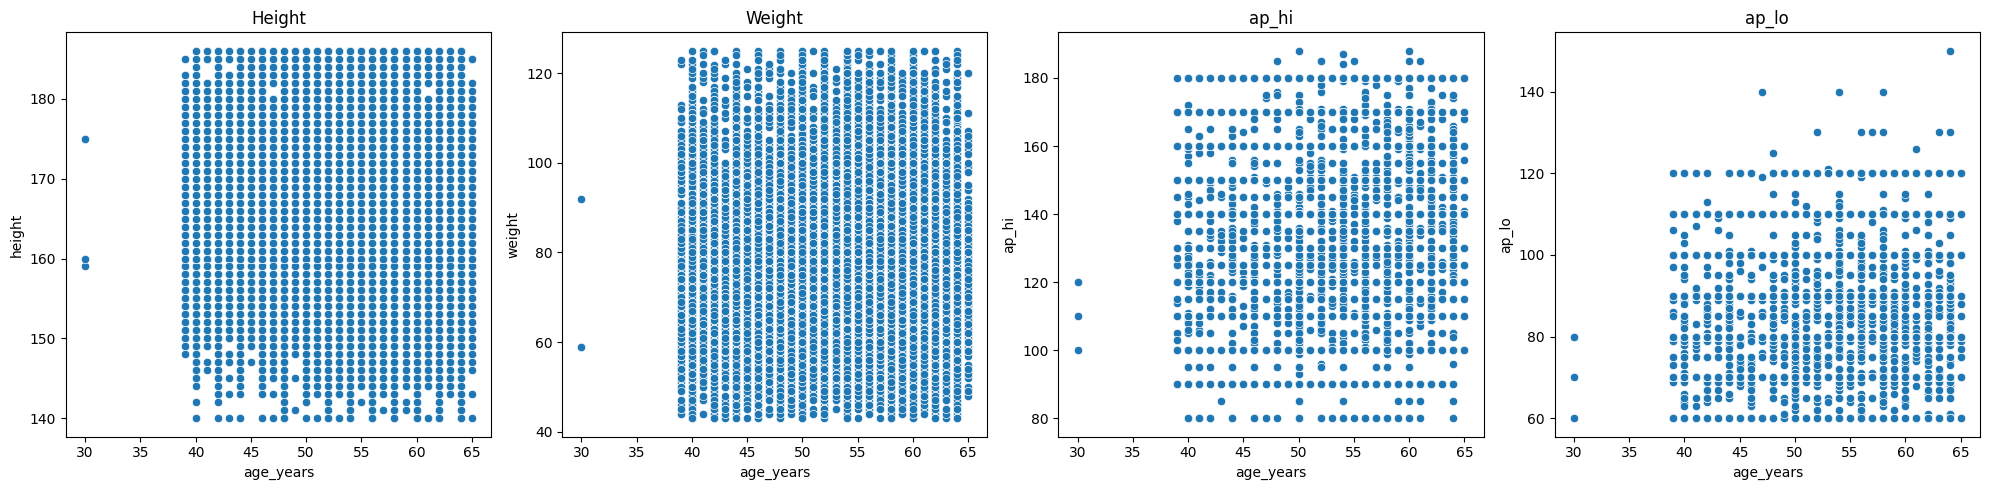

In [157]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

sns.scatterplot(x='age_years', y='height', data=df, ax=axs[0])
axs[0].set_title('Height')
sns.scatterplot(x='age_years', y='weight', data=df, ax=axs[1])
axs[1].set_title('Weight')
sns.scatterplot(x='age_years', y='ap_hi', data=df, ax=axs[2])
axs[2].set_title('ap_hi')
sns.scatterplot(x='age_years', y='ap_lo', data=df, ax=axs[3])
axs[3].set_title('ap_lo')

plt.tight_layout()
plt.show()

On remarque qu'il nous reste encore des outlier pour l'age. Nous allons donc supprimer ces valeurs là.

In [158]:
df = df[(df['age_years'] >= df['age_years'].quantile(0.025)) & (df['age_years'] <= df['age_years'].quantile(0.975))]
df.shape

(66684, 14)

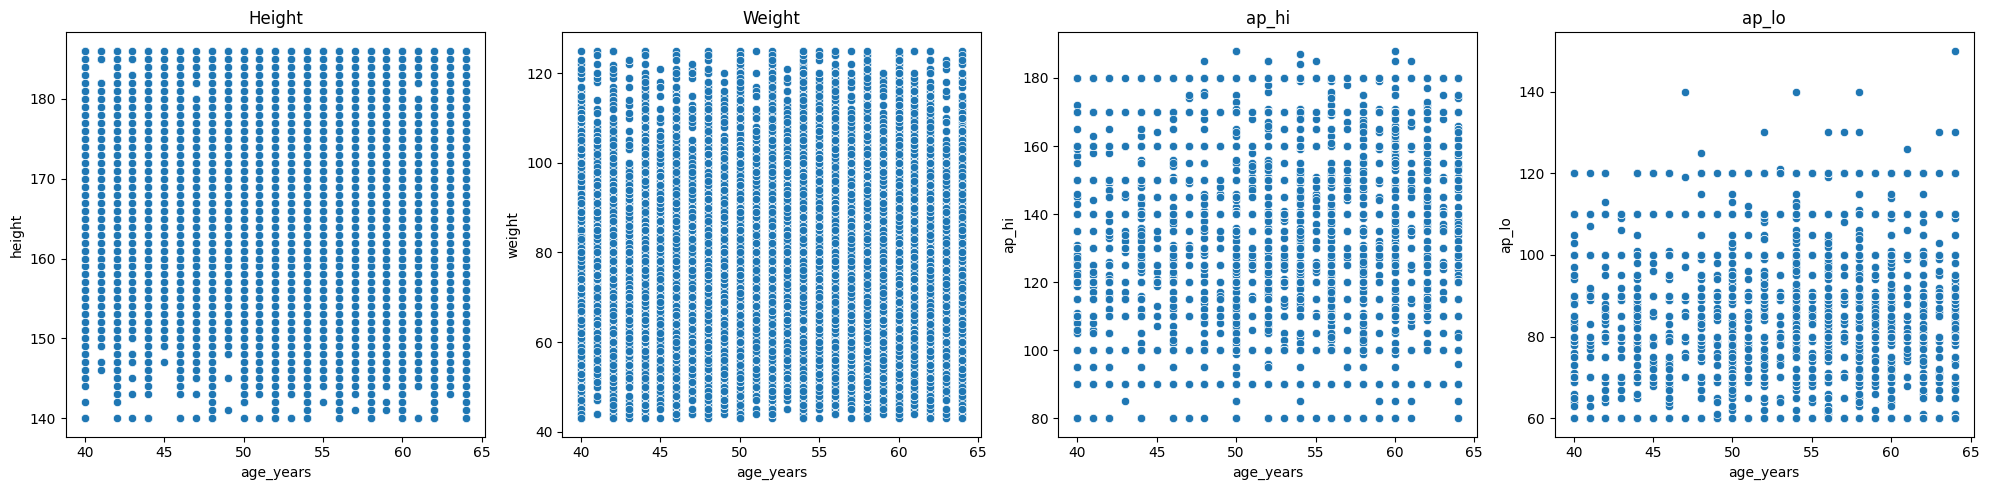

In [159]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

sns.scatterplot(x='age_years', y='height', data=df, ax=axs[0])
axs[0].set_title('Height')
sns.scatterplot(x='age_years', y='weight', data=df, ax=axs[1])
axs[1].set_title('Weight')
sns.scatterplot(x='age_years', y='ap_hi', data=df, ax=axs[2])
axs[2].set_title('ap_hi')
sns.scatterplot(x='age_years', y='ap_lo', data=df, ax=axs[3])
axs[3].set_title('ap_lo')

plt.tight_layout()
plt.show()

Nous avons donc maintenant un dataset sans outlier que nous pouvons analyser et ensuite exploiter avec notre algorithme.

Le dataset est passé de 70,000 observations à 66,684.


In [160]:
df.drop('id', axis=1, inplace=True)
df.drop('age', axis=1, inplace=True)

Nous supprimons la colonne id car elle ne nous est d'aucune utilité. Idem pour la colonne de l'age qui nous donne l'age en jours, nous exploiterons la nouvelle colonne 'age_years' qui nous donne l'age en années.

#### Visualisation

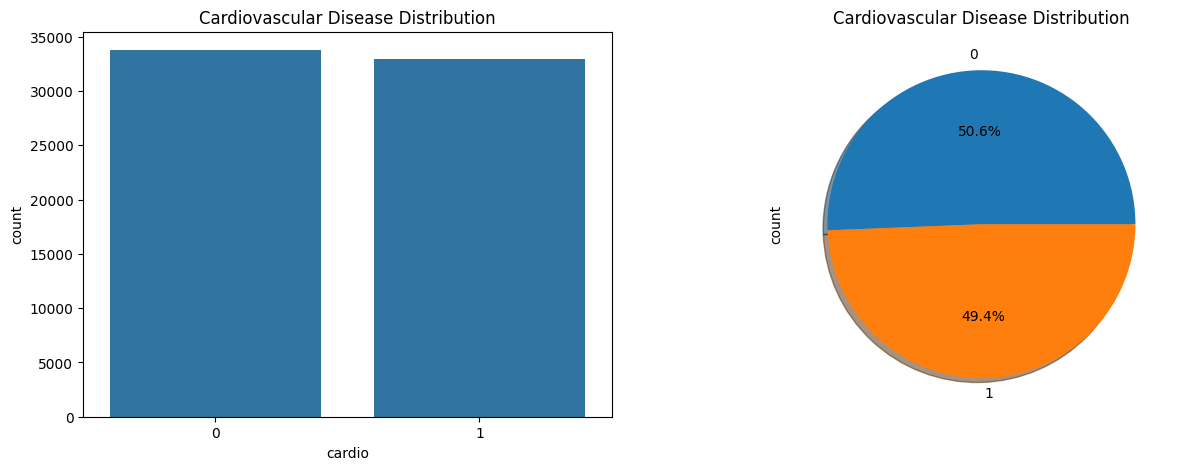

In [161]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x='cardio', data=df, ax=axs[0])
axs[0].set_title('Cardiovascular Disease Distribution')
df['cardio'].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[1], shadow=True)
axs[1].set_title('Cardiovascular Disease Distribution')
plt.show()

Ici on peut observer que le dataset est réparti de façon égale pour les personnes qui ont eu une maladie cardiovasculaire et ceux qui n'en ont pas eu. 

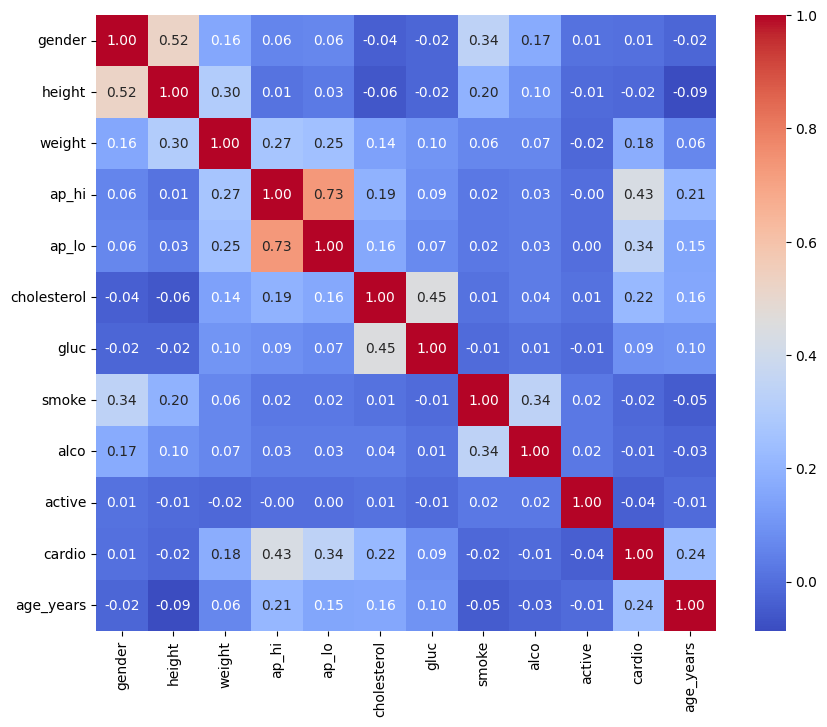

In [162]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

On observe dans cette matrice de corrélation qu'il y a une forte corrélation entre les 2 valeurs de pression artérielle ; nous avons une corrélation de 0.73.

Il y a également une forte corrélation entre la taille et le genre ; on a ici une corrélation de 0.52.

Pour les autres variables nous avons plusieurs corrélations qui sont autour de 0.3 / 0.4.

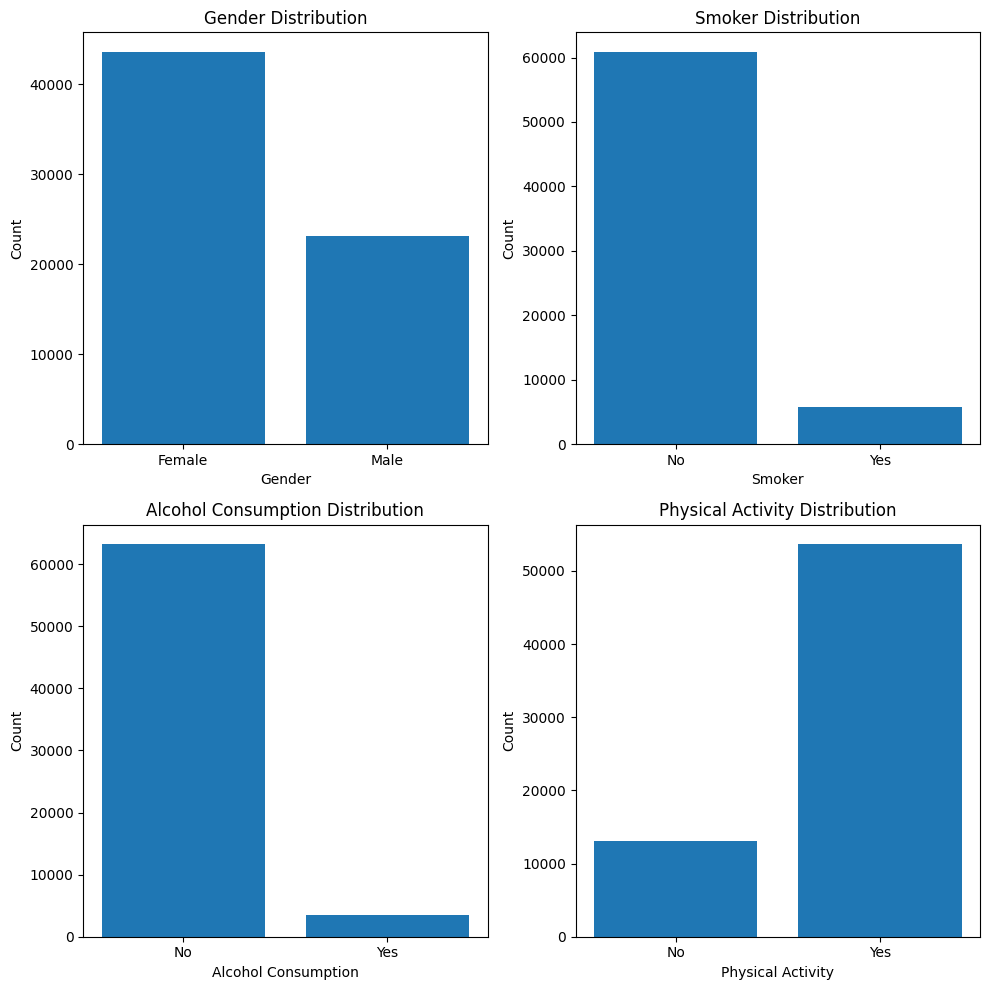

In [163]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Distribution des genres
gender_labels = ['Female', 'Male']
gender_values = [df[df['gender'] == 1].shape[0], df[df['gender'] == 2].shape[0]]
axs[0, 0].bar(gender_labels, gender_values)
axs[0, 0].set_title('Gender Distribution')
axs[0, 0].set_xlabel('Gender')
axs[0, 0].set_ylabel('Count')

# Distribution des fumeurs
smoker_labels = ['No', 'Yes']
smoker_values = [df[df['smoke'] == 0].shape[0], df[df['smoke'] == 1].shape[0]]
axs[0, 1].bar(smoker_labels, smoker_values)
axs[0, 1].set_title('Smoker Distribution')
axs[0, 1].set_xlabel('Smoker')
axs[0, 1].set_ylabel('Count')

# Distribution de la consommation d'alcool
alcohol_labels = ['No', 'Yes']
alcohol_values = [df[df['alco'] == 0].shape[0], df[df['alco'] == 1].shape[0]]
axs[1, 0].bar(alcohol_labels, alcohol_values)
axs[1, 0].set_title('Alcohol Consumption Distribution')
axs[1, 0].set_xlabel('Alcohol Consumption')
axs[1, 0].set_ylabel('Count')

# Distribution de l'activité physique
activity_labels = ['No', 'Yes']
activity_values = [df[df['active'] == 0].shape[0], df[df['active'] == 1].shape[0]]
axs[1, 1].bar(activity_labels, activity_values)
axs[1, 1].set_title('Physical Activity Distribution')
axs[1, 1].set_xlabel('Physical Activity')
axs[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()



Ici on peut observer la répartition dans le dataset des différentes variables binaires. Cela nous permet d'avoir une meilleure idée de la population avec laquelle nous travaillons.

On remarque qu'il y a :
* Plus de femmes que d'hommes dans le dataset
* Plus de personnes qui ne consomment pas d'alcool
* Plus de personnes qui ne fument pas
* Plus de personnes qui pratiquent une activité physique

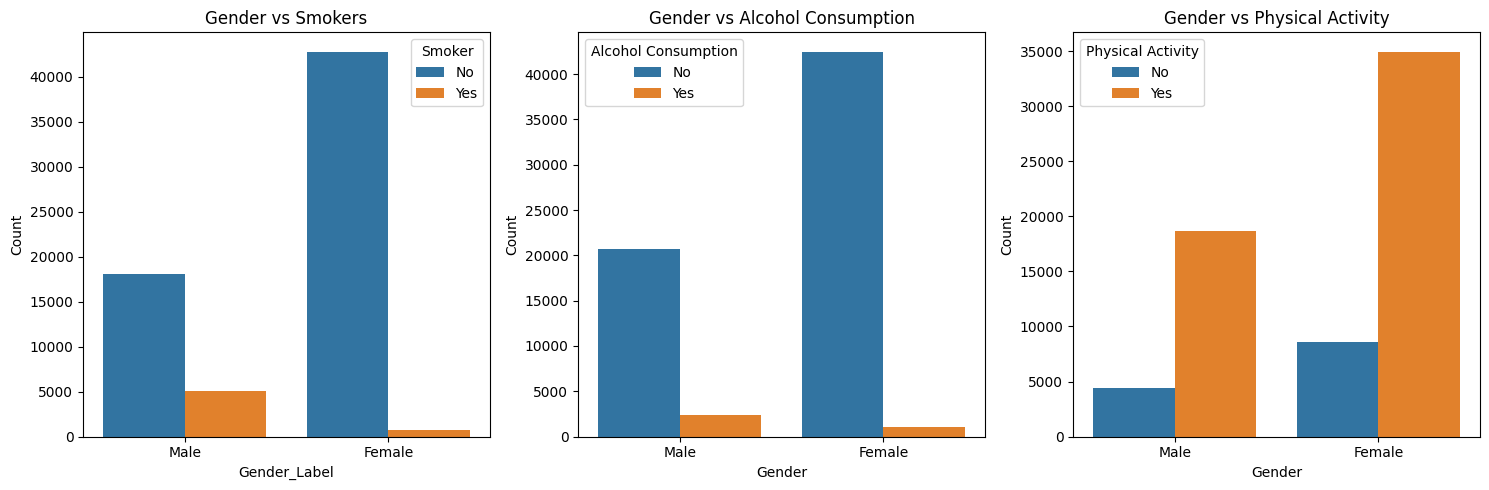

In [164]:
df['Gender_Label'] = df['gender'].map({1: 'Female', 2: 'Male'})

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Gender vs Smokers
sns.countplot(x='Gender_Label', hue='smoke', data=df, ax=axs[0])
axs[0].set_title('Gender vs Smokers')
axs[0].set_ylabel('Count')
axs[0].legend(title='Smoker', labels=activity_labels)

# Gender vs Alcohol Consumption
sns.countplot(x='Gender_Label', hue='alco', data=df, ax=axs[1])
axs[1].set_title('Gender vs Alcohol Consumption')
axs[1].set_xlabel('Gender')
axs[1].set_ylabel('Count')
axs[1].legend(title='Alcohol Consumption', labels=activity_labels)

# Gender vs Physical Activity
sns.countplot(x='Gender_Label', hue='active', data=df, ax=axs[2])
axs[2].set_title('Gender vs Physical Activity')
axs[2].set_xlabel('Gender')
axs[2].set_ylabel('Count')
axs[2].legend(title='Physical Activity', labels=activity_labels)

plt.tight_layout()
plt.show()

On observe que il y a plus de fumeurs chez les hommes que les femmes dans ce dataset. C'est également la meme observation pour la consommation d'alcool, malgré un plus grand nombre de femmes dans le dataset il y a plus de consommateur d'alcool chez les hommes. 

Cependant pour l'activité physique on remarque qu'il y a une répartition similaire entre les deux genre.

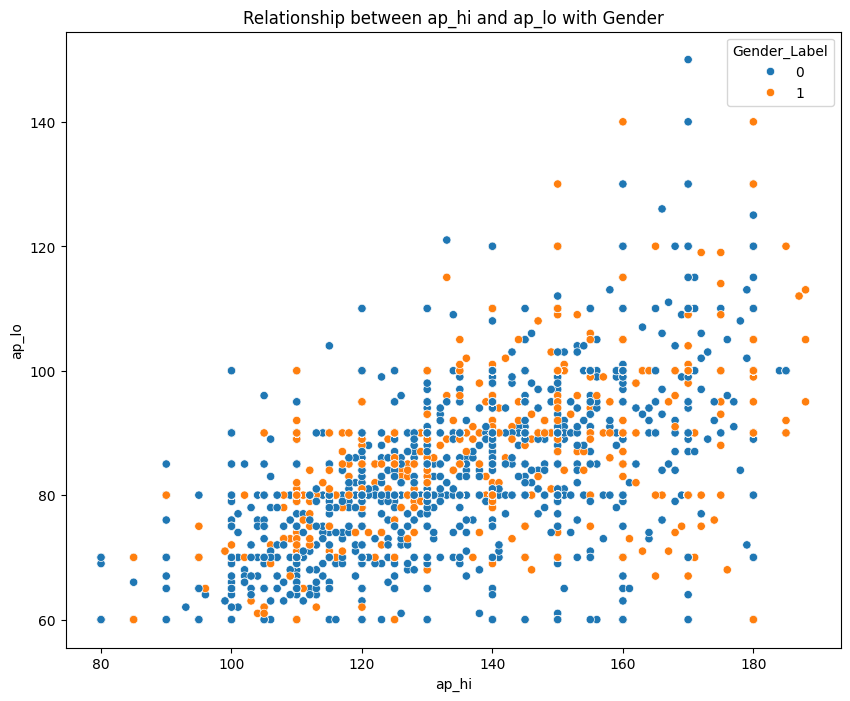

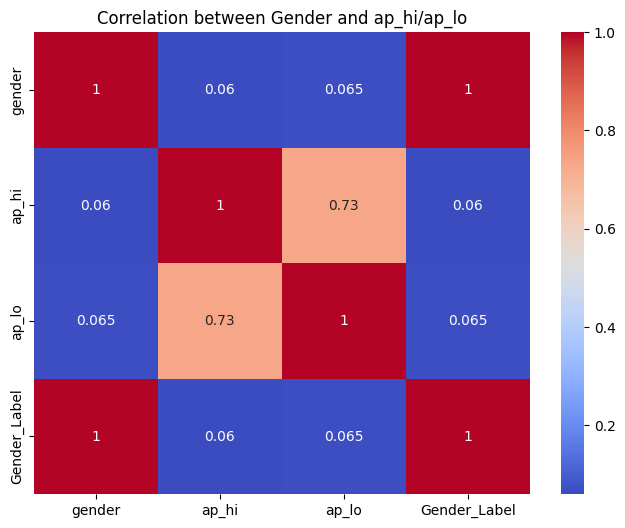

In [166]:
# Map gender labels to 0 and 1
df_gender_ap['Gender_Label'] = df_gender_ap['gender'].map({1: 0, 2: 1})

plt.figure(figsize=(10, 8))
sns.scatterplot(x='ap_hi', y='ap_lo', hue='Gender_Label', data=df_gender_ap)
plt.title('Relationship between ap_hi and ap_lo with Gender')
plt.xlabel('ap_hi')
plt.ylabel('ap_lo')

# Create a correlation matrix
corr_matrix = df_gender_ap.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Gender and ap_hi/ap_lo')
plt.show()


Il n'y a pas de corrélation spécifique entre la pression artérielle et le genre, nous avons une corrélation de 0.065 & 0.06 ce qui représente une corrélation faible.